<h2>Homework 1: Linear Regression on Boston Housing Data</h2>

You're asked to do the following tasks to predict boston house price:
<lu>
<li>Use scikit-learn</li>
<li>Implement analytical solution (normal equation) to obtain weights</li>
<li>Implement numerical solution (gradient descent) to obtain weights</li>
</lu>
    Note: the accuracy of your implementations should be close to that of a linear model from scikit-learn

In addition, you need to show the resulting intercept and coefficents, calculate errors on training dataset and testing dataset, and plot a figure to show your predictions and real prices on the testing dataset. 

In [1]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

In [2]:
# Load data from scikit-learn, which returns (data, target)
# note: if you call "boston = load_boston()", it returns a dictionary-like object
data, target = datasets.load_boston(True)

# Split the data into two parts: training data and testing data
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)

<h4>Use scikit-learn library in the following cell</h4>

Regression Object:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Regression Fit:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Coefficients: 
 [[ -1.12463481e-01   3.00810168e-02   4.07309919e-02   2.78676719e+00
   -1.72406347e+01   4.43248784e+00  -6.23998173e-03  -1.44848504e+00
    2.62113793e-01  -1.06390978e-02  -9.16398679e-01   1.24516469e-02
   -5.09349120e-01]]
Intercepts: 
 [ 30.28894834]
Mean squared error: 21.64
Mean squared error on Testing data: 24.31
Variance score: 0.67


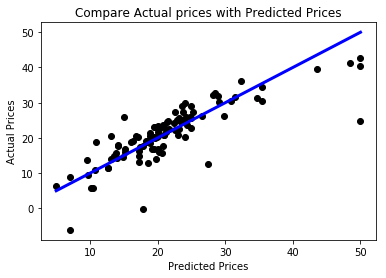

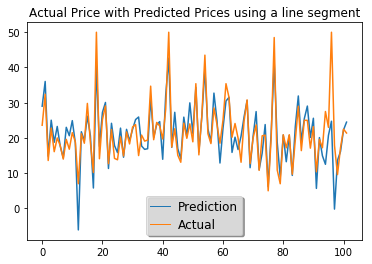

In [3]:
# Task 1-1: use linear regression in sklearn
# Make Regression Model
regr = linear_model.LinearRegression()
print("Regression Object: ", regr)

# Train the model using the training sets
regr.fit(train_data, train_target)
print("Regression Fit: ", regr)

# Task 1-2: show intercept and coefficents
# The coefficients
print('Coefficients: \n', regr.coef_)
# The Intercept
print('Intercepts: \n', regr.intercept_)

# Task 1-3: show errors on training dataset and testing dataset
# The mean squared error on training data
print("Mean squared error: %.2f" %np.mean((regr.predict(train_data) - train_target) ** 2))
# The mean squared error on testing data
print("Mean squared error on Testing data: %.2f" %np.mean((regr.predict(test_data) - test_target) ** 2))
# Variance score: Perfect Prediction == 1
print('Variance score: %.2f' %regr.score(test_data, test_target))

# Task 1-4: show plot a figure to show your predictions and real prices on the testing dataset
# Plot outputs: There are two figures for sake of variety
plt.scatter(test_target, regr.predict(test_data),  color='black')
plt.plot([train_target.min(),train_target.max()],[test_target.min(), test_target.max()], color='blue',linewidth=3)
plt.title("Task 1: Compare Actual prices with Predicted Prices")
plt.xlabel("Predicted Prices")
plt.ylabel("Actual Prices")
plt.xticks()
plt.yticks()

#Second Plot View
plt.figure()
plt.title("Task 1: Actual Price with Predicted Prices using a line segment")
plt.plot(np.arange(test_target.shape[0]), regr.predict(test_data), label='Prediction')
plt.plot(np.arange(test_target.shape[0]), test_target, label='Actual')

# Now add the legend with some customizations.
legend = plt.legend(loc='lower center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.0)  

plt.show()

<h4>Use analytical solution (normal equation) to perform linear regression in the following cell</h4>

W:  [  3.02889483e+01  -1.12463481e-01   3.00810168e-02   4.07309919e-02
   2.78676719e+00  -1.72406347e+01   4.43248784e+00  -6.23998173e-03
  -1.44848504e+00   2.62113793e-01  -1.06390978e-02  -9.16398679e-01
   1.24516469e-02  -5.09349120e-01]
Intercept:  [[ 30.28894834]]
Coefficient:  [ -1.12463481e-01   3.00810168e-02   4.07309919e-02   2.78676719e+00
  -1.72406347e+01   4.43248784e+00  -6.23998173e-03  -1.44848504e+00
   2.62113793e-01  -1.06390978e-02  -9.16398679e-01   1.24516469e-02
  -5.09349120e-01]
Mean squared error of training dataset: 21.64
Mean squared error of testing database: 24.31


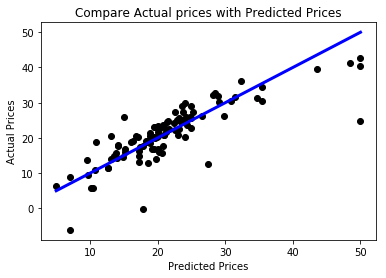

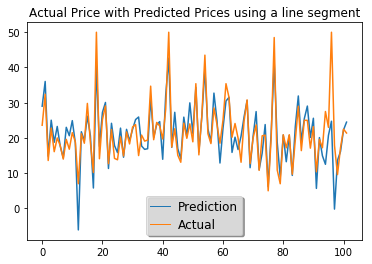

In [4]:
# Task 2-1: Implement a function solving normal equation 
# Inputs: Training data and  training label
# Output: Weights
def myNormalEqualFun(X,y):
    # Normal Equation Formula = Theta = ((xT * x)^-1) * xT * y
    theta = np.dot((np.dot((np.linalg.inv(np.dot(np.transpose(X), X))), np.transpose(X))), y)
    return theta
    
# Task 2-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    predict = np.dot(X,w)
    return predict

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myNormalEqual to train the model and get weights
w = myNormalEqualFun(train_data_intercept, train_target)
print("W: ", w.flatten())

# Task 2-3: show intercept and coefficents
# First element of weight array is intercept 
intercept = w[:1]
print("Intercept: ", intercept)

# Rest of the element of weight array are coefficient [1:13]
coefficient = w[1:].flatten()
print("Coefficient: ", coefficient)

# Task 2-4: show errors on training dataset and testing dataset
# The mean squared error
print("Mean squared error of training dataset: %.2f" 
          %np.mean((myPredictFun(train_data_intercept, w) - train_target) ** 2))
print("Mean squared error of testing database: %.2f" 
          %np.mean((myPredictFun(test_data_intercept, w) - test_target) ** 2))

# Task 2-5: show plot a figure to show your predictions and real prices on the testing dataset
# Plot outputs: There are two figures for sake of variety
plt.scatter(test_target, myPredictFun(test_data_intercept, w),  color='black')
plt.plot([train_target.min(),train_target.max()],[test_target.min(), test_target.max()], color='blue',linewidth=3)
plt.title("Task 2: Compare Actual prices with Predicted Prices")
plt.xlabel("Predicted Prices")
plt.ylabel("Actual Prices")
plt.xticks()
plt.yticks()

#Second Plot View
plt.figure()
plt.title("TasActual Price with Predicted Prices using a line segment")
plt.plot(np.arange(test_target.shape[0]), myPredictFun(test_data_intercept, w), label='Prediction')
plt.plot(np.arange(test_target.shape[0]), test_target, label='Actual')

# Now add the legend with some customizations.
legend = plt.legend(loc='lower center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.0)  

plt.show()

<h4>Use numerical solution (gradient descent) to perform linear regression in the following cell</h4>

In [5]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

# Task 3-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of iterations
# Output: Weights
def myGradientDescentFun(X,y,learning_rate,numItrs):
    # Single row is optimal for y
    y = y.flatten()
    
    # X = (404,14) --> M stores (404) for division and N stores (14) for intialization of theta array
    m, n = np.shape(X)
    
    # Create a theta array of size N and input random values
    theta = np.random.rand(n) 
    for i in range(numItrs):
        # Gradient Descent Formula = w = w + l_rate × 1/n * xT (y − x*w)
        hypothesis = myPredictFun(X, theta)
        loss = hypothesis - y
        gradient = (np.transpose(X)).dot(loss) / m
        theta = theta - learning_rate * gradient
        
        # Generate Cost Estimation and store it
        cost = np.sum((X.dot(theta) - y) ** 2) / 2 / m
        cost_history[i] = cost

    # Currently Theta is 1x14 but for accurate prediction 14x1 is required
    return theta.reshape(n,1)

# Task 3-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    predict = np.dot(X,w)
    return predict

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w, cost = myGradientDescentFun(train_data_intercept,train_target,0.0986,1000)
print("W: ", w.flatten())

# Task 3-3: show intercept and coefficents
intercept = w[:1]
print("Intercept: ", intercept)

# Rest of the element of weight array are coefficient [1:13]
coefficient = w[1:].flatten()
print("Coefficient: ", coefficient)

# Task 3-4: show errors on training dataset and testing dataset
print("Mean squared error of training dataset: %.2f" 
          %np.mean((myPredictFun(train_data_intercept, w) - train_target) ** 2))
print("Mean squared error of testing database: %.2f" 
          %np.mean((myPredictFun(test_data_intercept,  w) - test_target) ** 2))

# Task 3-5: show plot a figure to show your predictions and real prices on the testing dataset
# Plot outputs: There are two figures for sake of variety
plt.scatter(test_target, myPredictFun(test_data_intercept, w),  color='black')
plt.plot([train_target.min(),train_target.max()],[test_target.min(), test_target.max()], color='blue',linewidth=3)
plt.title("Task 3: Compare Actual prices with Predicted Prices")
plt.xlabel("Predicted Prices")
plt.ylabel("Actual Prices")
plt.xticks()
plt.yticks()

#Second Plot View
plt.figure()
plt.title("Task 3: Actual Price with Predicted Prices using a line segment")
plt.plot(np.arange(test_target.shape[0]), myPredictFun(test_data_intercept, w), label='Prediction')
plt.plot(np.arange(test_target.shape[0]), test_target, label='Actual')

# Now add the legend with some customizations.
legend = plt.legend(loc='lower center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.0)  

plt.show()